In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\hp\Desktop\python\datasets\archive\diabetes.csv')

data.head()

# notre target est: Outcome
# on a 768 lignes et 9 colonnes
# types des variab

#visualiser les donnees manquantes
df = data.copy()
#sns.heatmap(df.isna(),cbar=False)
df.head()


df['Outcome'].value_counts(normalize =True)
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

# plt.figure(figsize=(12,8))
# plt.plot(X,Y)
df.head()

zeros = df[df['Outcome']==0] 
uns = df[df['Outcome']==1] 


# for col in uns:
#     plt.figure(figsize=(15,8))
#     sns.displot(zeros[col],label='zero')
#     sns.displot(uns[col],label='un')
#     plt.legend()

# df.corr().sort_values


0    393
1    221
Name: Outcome, dtype: int64
0    107
1     47
Name: Outcome, dtype: int64
[[87 20]
 [16 31]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



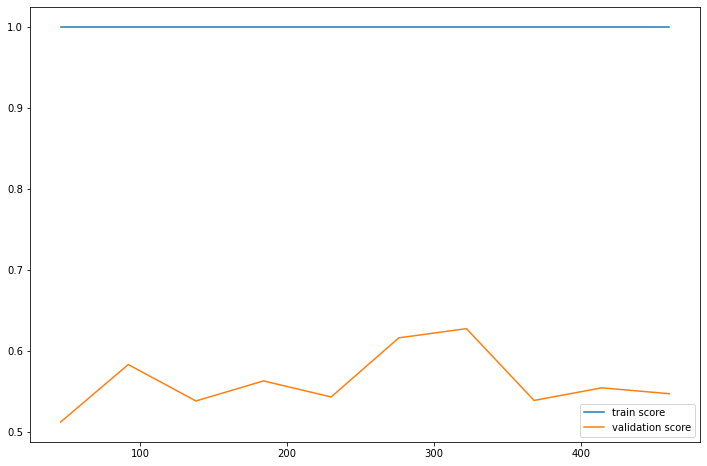

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix , classification_report
from sklearn.model_selection import learning_curve

model = DecisionTreeClassifier(random_state=0)

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)


def preprocessing(df):
    
    X= df.drop('Outcome', axis=1)
    Y= df['Outcome']
    print(Y.value_counts())
    return X,Y

X_train, Y_train = preprocessing(trainset)
X_test, Y_test = preprocessing(testset)
def evaluation(model):
    model.fit(X_train, Y_train)
    ypred=model.predict(X_test)
    
    print(confusion_matrix(Y_test,ypred))
    print(classification_report(Y_test, ypred))
    
    N, train_score, val_score = learning_curve(model,X_train,Y_train,
                                              cv=4,scoring='f1',
                                              train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    
    plt.legend()

evaluation(model)

RandomForest
[[96 11]
 [17 30]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154

AdaBoost
[[92 15]
 [16 31]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154

SVM
[[97 10]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77  

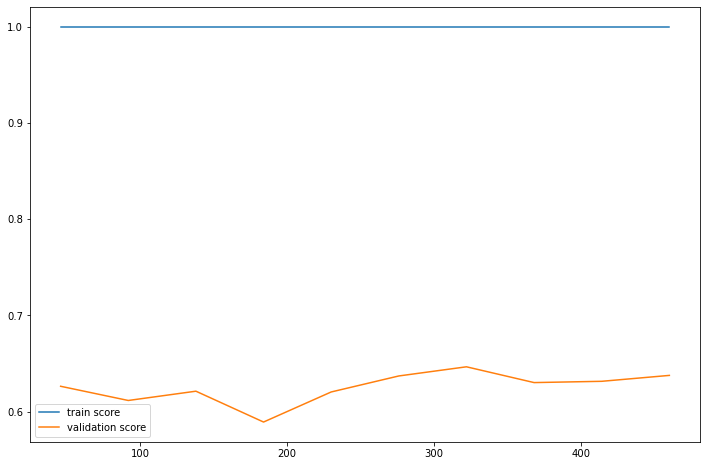

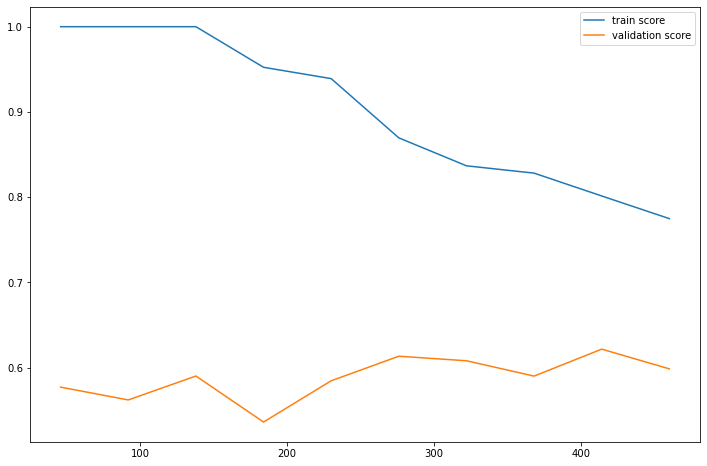

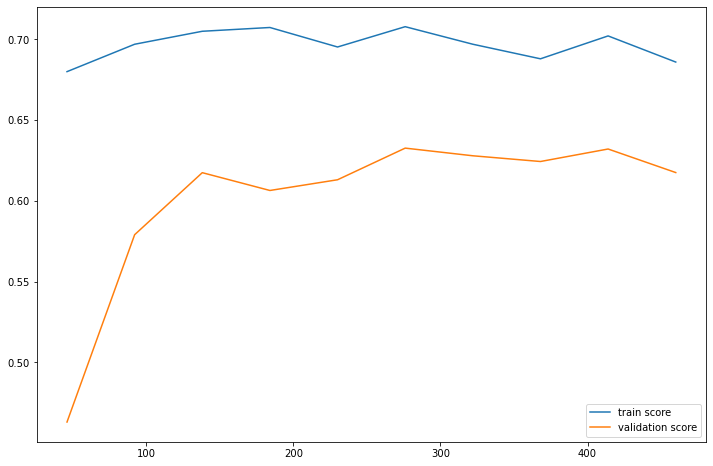

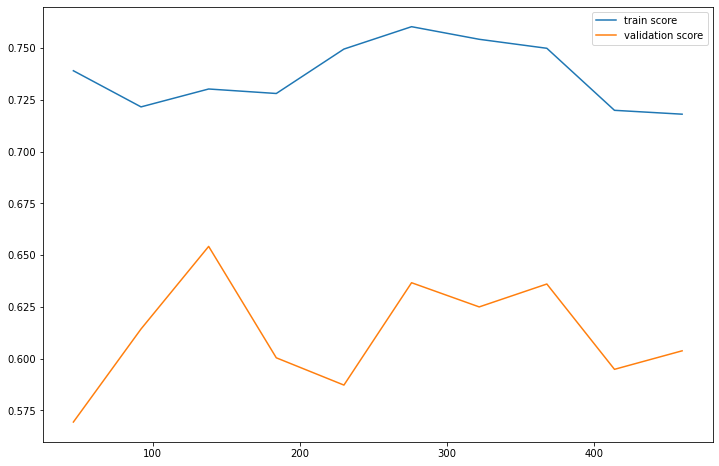

In [12]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler() ,SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler() ,KNeighborsClassifier())

#liste de model
#list_of_models = [RandomForest,AdaBoost,SVM,KNN]
dict_of_model={
    'RandomForest':RandomForest,
    'AdaBoost':AdaBoost,
    'SVM':SVM,
    'KNN':KNN
}

for name, model in dict_of_model.items():
    print(name)
    evaluation(model)


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


model = SVC()
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
accuracy = accuracy_score(Y_test, ypred)
print('Accuracy: {}'.format(accuracy))
ypred

Accuracy: 0.7922077922077922


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)